# Linear regression without scikit-learn

In this notebook, we introduce linear regression. Before presenting the
available scikit-learn classes, we will provide some insights with a simple
example. We will use a dataset that contains measurements taken on penguins.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


We will formulate the following problem: using the flipper length of a penguin, 
we would like to infer its mass.

Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

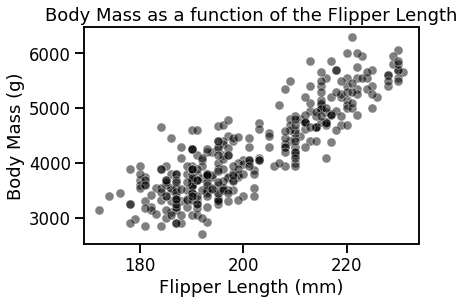

In [2]:
import seaborn as sns

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.set_title("Body Mass as a function of the Flipper Length")

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The function <tt class="docutils literal">scatterplot</tt> from seaborn take as input the full dataframe
and the parameter <tt class="docutils literal">x</tt> and <tt class="docutils literal">y</tt> allows to specify the name of the columns to
be plotted. Note that this function returns a matplotlib axis
(named <tt class="docutils literal">ax</tt> in the example above) that can be further used to add elements on
the same matplotlib axis (such as a title).</p>
</div>

In this problem, penguin mass is our target. It is a continuous
variable that roughly varies between 2700 g and 6300 g. Thus, this is a
regression problem (in contrast to classification). We also see that there is
almost a linear relationship between the body mass of the penguin and its
flipper length. The longer the flipper, the heavier the penguin.

Thus, we could come up with a simple formula, where given a flipper length
we could compute the body mass of a penguin using a linear relationship
of the form `y = a * x + b` where `a` and `b` are the 2 parameters of our
model.

In [3]:
def linear_model_flipper_mass(flipper_length, weight_flipper_length,
                              intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

Using the model we defined above, we can check the body mass values
predicted for a range of flipper lengths. We will set `weight_flipper_length`
to be 45 and `intercept_body_mass` to be -5000.

In [4]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

We can now plot all samples and the linear model prediction.

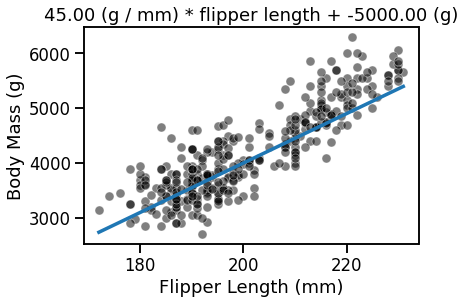

In [5]:
label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

The variable `weight_flipper_length` is a weight applied to the feature
`flipper_length` in order to make the inference. When this coefficient is
positive, it means that penguins with longer flipper lengths will have larger
body masses. If the coefficient is negative, it means that penguins with
shorter flipper lengths have larger body masses. Graphically, this
coefficient is represented by the slope of the curve in the plot. Below we
show what the curve would look like when the `weight_flipper_length`
coefficient is negative.

In [6]:
weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

We can now plot all samples and the linear model prediction.

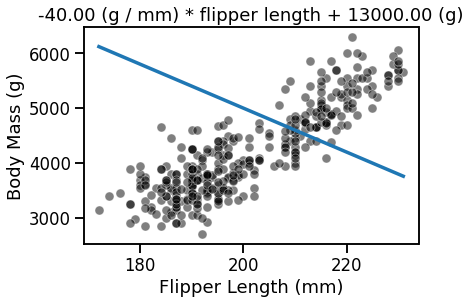

In [7]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

In our case, this coefficient has a meaningful unit: g/mm.
For instance, a coefficient of 40 g/mm, means that for each
additional millimeter in flipper length, the body weight predicted will
increase by 40 g.

In [8]:
body_mass_180 = linear_model_flipper_mass(
    flipper_length=180, weight_flipper_length=40, intercept_body_mass=0)
body_mass_181 = linear_model_flipper_mass(
    flipper_length=181, weight_flipper_length=40, intercept_body_mass=0)

print(f"The body mass for a flipper length of 180 mm "
      f"is {body_mass_180} g and {body_mass_181} g "
      f"for a flipper length of 181 mm")

The body mass for a flipper length of 180 mm is 7200 g and 7240 g for a flipper length of 181 mm


We can also see that we have a parameter `intercept_body_mass` in our model.
This parameter corresponds to the value on the y-axis if `flipper_length=0`
(which in our case is only a mathematical consideration, as in our data,
 the value of `flipper_length` only goes from 170mm to 230mm). This y-value
when x=0 is called the y-intercept. If `intercept_body_mass` is 0, the curve
will pass through the origin:

In [10]:
weight_flipper_length = 25
intercept_body_mass = 0

# redefined the flipper length to start at 0 to plot the intercept value
flipper_length_range = np.linspace(0, data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

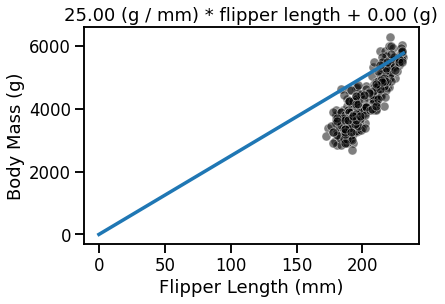

In [11]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

Otherwise, it will pass through the `intercept_body_mass` value:

In [12]:
weight_flipper_length = 45
intercept_body_mass = -5000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

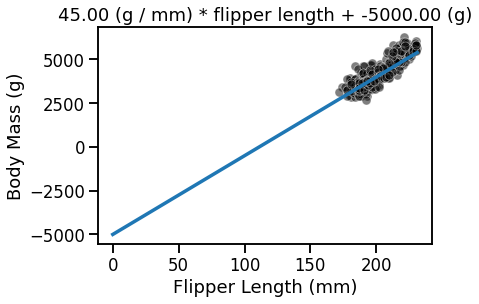

In [13]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

 In this notebook, we have seen the parametrization of a linear regression
 model and more precisely meaning of the terms weights and intercepts.